In [94]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.collocations import *
from nltk import FreqDist
from nltk import word_tokenize
import string
import re
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import label_binarize, LabelEncoder
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree 
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier

In [95]:
# import book data
books = pd.read_csv('all_books.csv', index_col=0)

In [96]:
books.head()

,author,title,text
0,austen,Emma-JA,"['volume', 'chapter', 'emma', 'woodhouse', 'ha..."
1,austen,LS-JA,"['lady', 'susan', 'vernon', 'mr', 'vernon', 'l..."
2,austen,Mansfield-JA,"['chapter', 'thirty', 'year', 'ago', 'miss', '..."
3,austen,Northranger_Abbey-JA,"['advertisement', 'authoress', 'northanger', '..."
4,austen,PP_JA,"['chapter', '1', 'truth', 'universally', 'ackn..."


In [97]:
freqdist = FreqDist(books.text)

In [98]:
bookvect = CountVectorizer()

In [99]:
# count vectorize all the text of books
X_train_counts = bookvect.fit_transform(books['text'])

In [100]:
# set target as author and binarize
target = books.author
y = label_binarize(target, classes=['austen', 'dickens', 'doyle', 'emerson', 'hawthorne', 'keats',
       'melville', 'milton', 'poe', 'shakespeare', 'twain', 'wilde'])

In [101]:
# train, test, split
X_train, X_test, y_train, y_test = train_test_split(X_train_counts, target, stratify=target)

In [102]:
# Instantiate model 
rf = RandomForestClassifier(n_estimators= 1000, random_state=42,bootstrap=True, n_jobs=1)

# Train the model on training data
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [103]:
# make prediction and compare them 
rf_pred = rf.predict(X_test)

In [104]:
# let's see how the model ran
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

      austen       1.00      0.50      0.67         2
     dickens       0.50      1.00      0.67         5
       doyle       0.67      0.80      0.73         5
     emerson       1.00      1.00      1.00         3
   hawthorne       0.00      0.00      0.00         3
       keats       0.50      0.75      0.60         4
    melville       1.00      0.33      0.50         3
      milton       1.00      0.33      0.50         3
         poe       0.50      0.50      0.50         4
 shakespeare       0.90      1.00      0.95         9
       twain       1.00      0.25      0.40         4
       wilde       0.67      1.00      0.80         4

   micro avg       0.69      0.69      0.69        49
   macro avg       0.73      0.62      0.61        49
weighted avg       0.73      0.69      0.65        49



/Users/lrsterngmail.com/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/lrsterngmail.com/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/lrsterngmail.com/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [105]:
# we can see that random forest performed better than linear regression because it averages out the variance...but
# can we tune the model even more to achieve better performance?

#adjusting max_features : number of features we're using when considering best splits 
rf_new = RandomForestClassifier(n_estimators = 100, max_depth = None, 
                               min_samples_split = 2, min_samples_leaf = 1 , max_features = "sqrt")
rf_new.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [106]:
rf_new.predict(X_test)

array(['shakespeare', 'shakespeare', 'doyle', 'twain', 'austen', 'wilde',
       'wilde', 'dickens', 'dickens', 'shakespeare', 'melville',
       'dickens', 'dickens', 'shakespeare', 'poe', 'poe', 'emerson',
       'poe', 'wilde', 'shakespeare', 'doyle', 'poe', 'doyle', 'dickens',
       'shakespeare', 'keats', 'doyle', 'milton', 'shakespeare', 'keats',
       'shakespeare', 'shakespeare', 'doyle', 'twain', 'shakespeare',
       'dickens', 'poe', 'keats', 'keats', 'dickens', 'keats', 'wilde',
       'doyle', 'emerson', 'emerson', 'melville', 'keats', 'wilde',
       'doyle'], dtype=object)

In [107]:
# make prediction and compare them 
rf_pred = rf_new.predict(X_test)

In [108]:
# let's see how the model ran
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

      austen       1.00      0.50      0.67         2
     dickens       0.71      1.00      0.83         5
       doyle       0.71      1.00      0.83         5
     emerson       1.00      1.00      1.00         3
   hawthorne       0.00      0.00      0.00         3
       keats       0.50      0.75      0.60         4
    melville       1.00      0.67      0.80         3
      milton       1.00      0.33      0.50         3
         poe       0.40      0.50      0.44         4
 shakespeare       0.90      1.00      0.95         9
       twain       1.00      0.50      0.67         4
       wilde       0.80      1.00      0.89         4

   micro avg       0.76      0.76      0.76        49
   macro avg       0.75      0.69      0.68        49
weighted avg       0.76      0.76      0.72        49



/Users/lrsterngmail.com/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/lrsterngmail.com/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/lrsterngmail.com/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [109]:
# growing more trees also help 
rf_new = RandomForestClassifier(n_estimators = 1000, max_depth = None, 
                               min_samples_split = 2, min_samples_leaf = 1 , max_features = "sqrt")
rf_new.fit(X_train,y_train)

rf_pred = rf_new.predict(X_test)

# Calculate the absolute errors
#rmse_rf = np.sqrt(mean_squared_error(y_test,rf_pred))
#rmse_rf

In [110]:
# let's see how the model ran
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

      austen       1.00      0.50      0.67         2
     dickens       0.50      1.00      0.67         5
       doyle       0.67      0.80      0.73         5
     emerson       1.00      1.00      1.00         3
   hawthorne       0.00      0.00      0.00         3
       keats       0.50      0.75      0.60         4
    melville       1.00      0.33      0.50         3
      milton       1.00      0.33      0.50         3
         poe       0.50      0.50      0.50         4
 shakespeare       0.90      1.00      0.95         9
       twain       1.00      0.25      0.40         4
       wilde       0.67      1.00      0.80         4

   micro avg       0.69      0.69      0.69        49
   macro avg       0.73      0.62      0.61        49
weighted avg       0.73      0.69      0.65        49



/Users/lrsterngmail.com/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/lrsterngmail.com/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/lrsterngmail.com/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


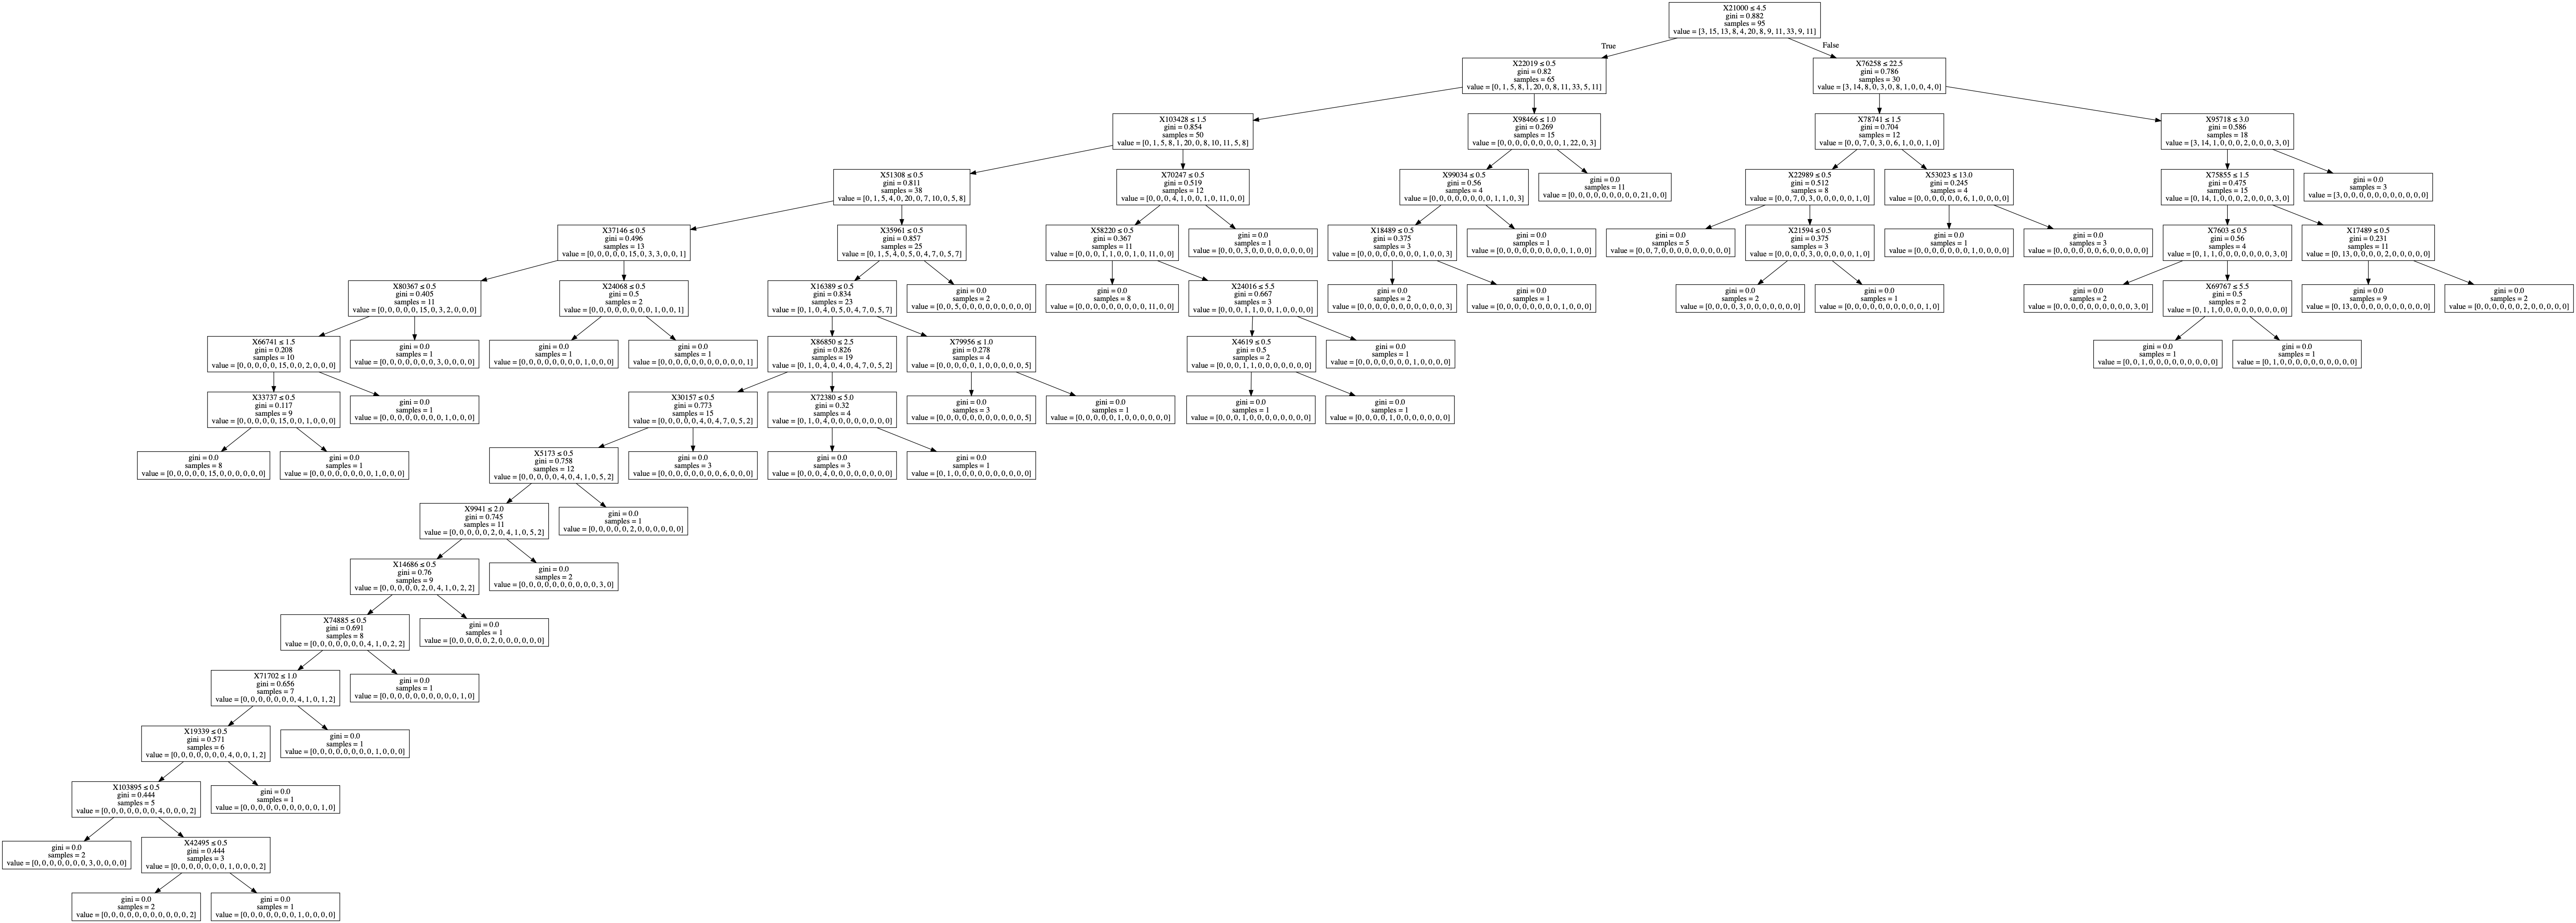

In [111]:
# Let's visualize one single dtree
# Import tools needed for visualization
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Pull out one tree from the forest
tree = rf_new.estimators_[5]

# Export the image to a dot file
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [112]:
print('The depth of this tree is:', tree.tree_.max_depth)

The depth of this tree is: 16


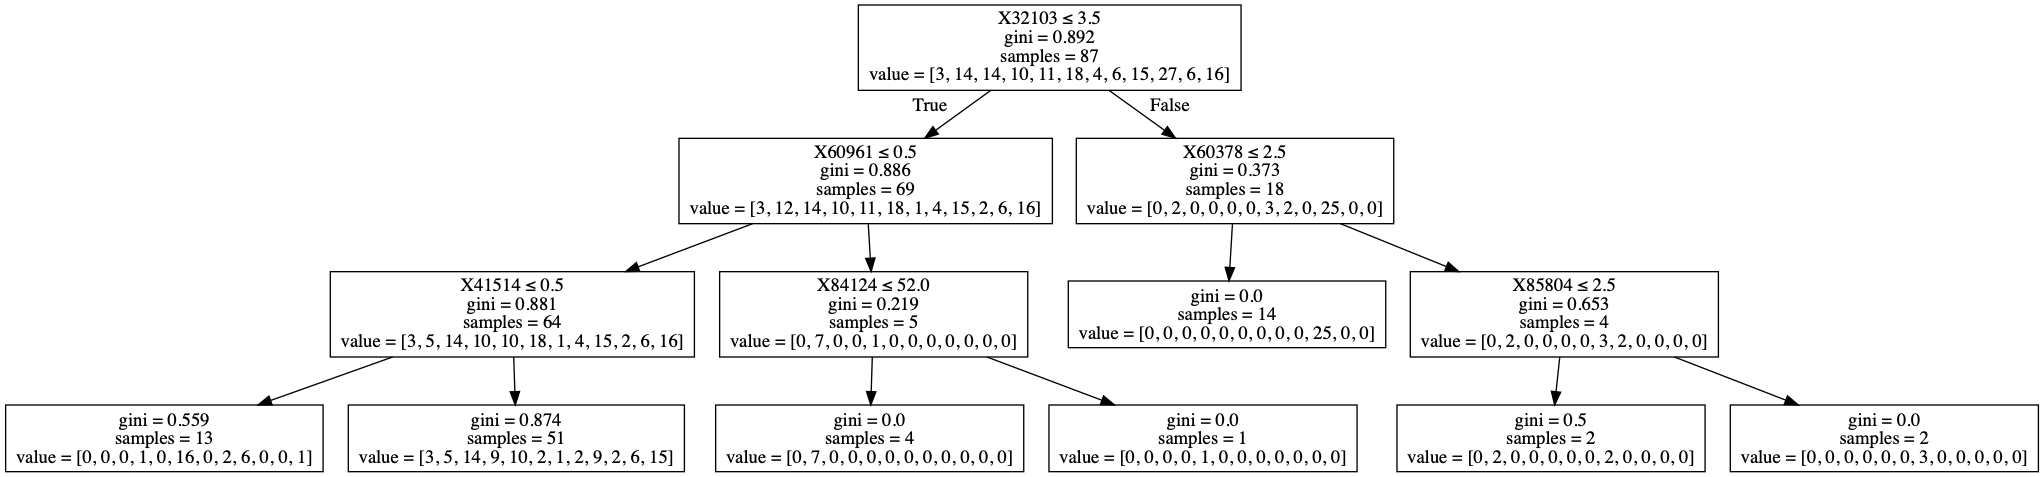

In [113]:
# limit the depth of the tree
rf_small = RandomForestClassifier(n_estimators=10, max_depth = 3, random_state=42)
rf_small.fit(X_train, y_train)

rf_pred_small = rf_small.predict(X_test)
# Extract the small tree
tree_small = rf_small.estimators_[5]

# Save the tree as a png image
dot_data = StringIO()
export_graphviz(tree_small, out_file=dot_data,  
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [114]:
# let's see how the model ran
print(classification_report(y_test, rf_pred_small))

              precision    recall  f1-score   support

      austen       0.00      0.00      0.00         2
     dickens       0.62      1.00      0.77         5
       doyle       0.30      0.60      0.40         5
     emerson       1.00      0.33      0.50         3
   hawthorne       0.00      0.00      0.00         3
       keats       0.38      0.75      0.50         4
    melville       1.00      0.67      0.80         3
      milton       0.00      0.00      0.00         3
         poe       0.50      0.50      0.50         4
 shakespeare       0.82      1.00      0.90         9
       twain       1.00      0.50      0.67         4
       wilde       1.00      0.50      0.67         4

   micro avg       0.59      0.59      0.59        49
   macro avg       0.55      0.49      0.48        49
weighted avg       0.60      0.59      0.55        49



/Users/lrsterngmail.com/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/lrsterngmail.com/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/lrsterngmail.com/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


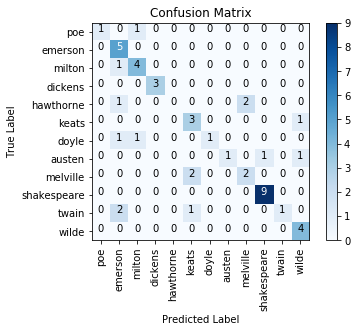

In [115]:
# function to plot confusion matrix 
def show_cf(y_true, y_pred, class_names=None):
    cf = confusion_matrix(y_true, y_pred)
    plt.imshow(cf, cmap=plt.cm.Blues)
    
    plt.title("Confusion Matrix")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    class_names = set(y_true)
    tick_marks = np.arange(len(class_names))
    if class_names:
        plt.xticks(tick_marks, class_names, rotation='vertical')
        plt.yticks(tick_marks, class_names)
    
    thresh = cf.max() / 2.
    
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, cf[i, j], horizontalalignment='center', color='white' if cf[i, j] > thresh else 'black')

    plt.colorbar()

# call function to plot confusion matrix from our model
show_cf(y_test, rf_pred)